In [4]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
!pip install cmdstanpy==0.9.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.3
    Uninstalling cmdstanpy-1.0.3:
      Successfully uninstalled cmdstanpy-1.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1 requires cmdstanpy>=1.0.1, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
!pip install statsmodels.tsa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement statsmodels.tsa (from versions: none)
ERROR: No matching distribution found for statsmodels.tsa


In [5]:
from google.colab import files
uploaded = files.upload()

Saving wind_dataset.csv to wind_dataset.csv


In [6]:
time_col, value_col = 'time', 'value'
data_file='wind_dataset.csv'
wind_date_col, wind_value_col = 'DATE', 'WIND'
wind_col_dict = { wind_date_col: time_col, wind_value_col: value_col }

In [7]:
df=pd.read_csv(data_file,parse_dates=[wind_date_col])
df= df.rename(columns=wind_col_dict)
df=df.set_index(time_col, drop=True)

In [10]:
df_prophet = df.reset_index().rename(columns={time_col: 'ds', value_col: 'y'}).copy()
df_prophet.head()

,ds,y,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [11]:
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [12]:
future = model.make_future_dataframe(periods=0, freq='M', include_history=True)
future.tail()

,ds
6569,1978-12-27
6570,1978-12-28
6571,1978-12-29
6572,1978-12-30
6573,1978-12-31


In [13]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6569,1978-12-27,10.197277,5.993023,17.990460,10.197277,10.197277,1.625095,1.625095,1.625095,0.027098,0.027098,0.027098,1.597997,1.597997,1.597997,0.0,0.0,0.0,11.822373
6570,1978-12-28,10.197821,6.053011,17.678590,10.197821,10.197821,1.529149,1.529149,1.529149,-0.068598,-0.068598,-0.068598,1.597747,1.597747,1.597747,0.0,0.0,0.0,11.726970
6571,1978-12-29,10.198364,5.425406,17.518483,10.198364,10.198364,1.546901,1.546901,1.546901,-0.057467,-0.057467,-0.057467,1.604368,1.604368,1.604368,0.0,0.0,0.0,11.745265
6572,1978-12-30,10.198907,5.875688,17.843652,10.198907,10.198907,1.695157,1.695157,1.695157,0.077158,0.077158,0.077158,1.617998,1.617998,1.617998,0.0,0.0,0.0,11.894063
6573,1978-12-31,10.199450,5.745853,17.924487,10.199450,10.199450,1.656434,1.656434,1.656434,0.017842,0.017842,0.017842,1.638592,1.638592,1.638592,0.0,0.0,0.0,11.855884


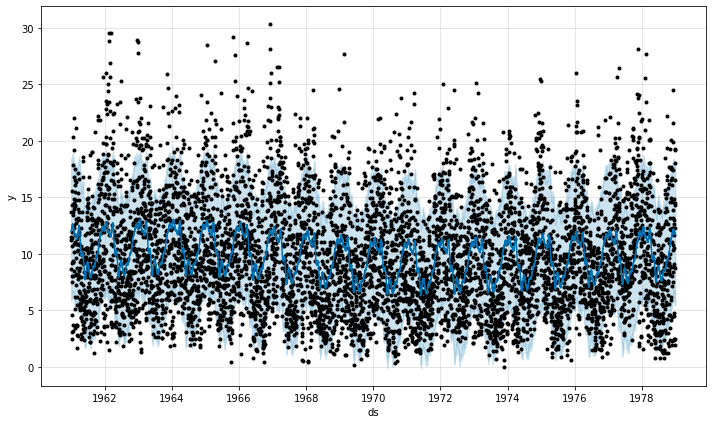

In [14]:
model.plot(forecast)
plt.show()

In [15]:
forecast["y"] = df_prophet["y"]
anomaly_array = np.array((forecast["y"] > forecast["yhat_upper"]) | (forecast["y"] < forecast["yhat_lower"]))
anomaly_array = np.where(anomaly_array==0, np.nan, anomaly_array)

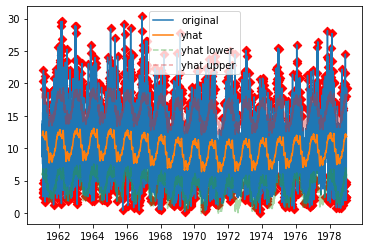

In [16]:
plt.plot(df_prophet.ds, df_prophet.y, label="original")
plt.plot(forecast.ds, forecast.yhat, label="yhat")

plt.plot(forecast.ds, forecast.yhat_lower, '--', label="yhat lower", alpha=0.4)
plt.plot(forecast.ds, forecast.yhat_upper, '--', label="yhat upper", alpha=0.4)

plt.scatter(df.index, anomaly_array * df[value_col], color='r', marker='D', zorder=2)

plt.legend(); plt.show()